# Motif enrichment analysis

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "./scripts")
import functions as f
from matplotlib import pyplot as plt
import seaborn as sns
from copy import copy
import multiprocessing as mp
import joblib
from tqdm import tqdm
from scipy import stats

In [2]:
cfg = f.get_actual_parametrization("./config.json")

RANDOM_SEED: 19
TEST_NETWORK_SIZE: 500
TEST_NETWORK_LINK_PROB: 0.1
N_CORES_TO_USE: -1
NETWORK_TO_SEARCH_IN: yeast


### Motifs library

There are conventional denotations for all possible triads as presented below

<img src="./pics/triads.png" width=2000 height=20/>

# Yeast Tnet

In [3]:
cfg = f.update_cfg("./config.json", "NETWORK_TO_SEARCH_IN", "yeast")

RANDOM_SEED: 19
TEST_NETWORK_SIZE: 500
TEST_NETWORK_LINK_PROB: 0.1
N_CORES_TO_USE: -1
NETWORK_TO_SEARCH_IN: yeast


In [4]:
interaction_matrix = f.get_interaction_matrix(cfg)

In [5]:
%%time
motifs_orig, counter_orig = f.motif_search(cfg, interaction_matrix, batch_size=10000)
counter_orig

CPU times: user 2.63 s, sys: 141 ms, total: 2.77 s
Wall time: 8.6 s


{'021C': 37631, '021D': 1059856, '021U': 26042, '030C': 8, '030T': 3370}

#### Random networks motif counting

In [12]:
N_SIMS = 1000
N_STEPS = 10
N_SWAPS = 60000
counters = f.generate_random_networks(cfg, interaction_matrix, N_SIMS, N_STEPS, N_SWAPS)
# joblib.dump(counters, "./networks/yeast/shuffled_counters.gz");

100%|██████████| 100/100 [15:10<00:00,  9.10s/it]


#### Z-score and P-value estimation

In [6]:
counters = joblib.load("./networks/yeast/shuffled_counters.gz");

100%|██████████| 1000/1000 [00:03<00:00, 254.09it/s]


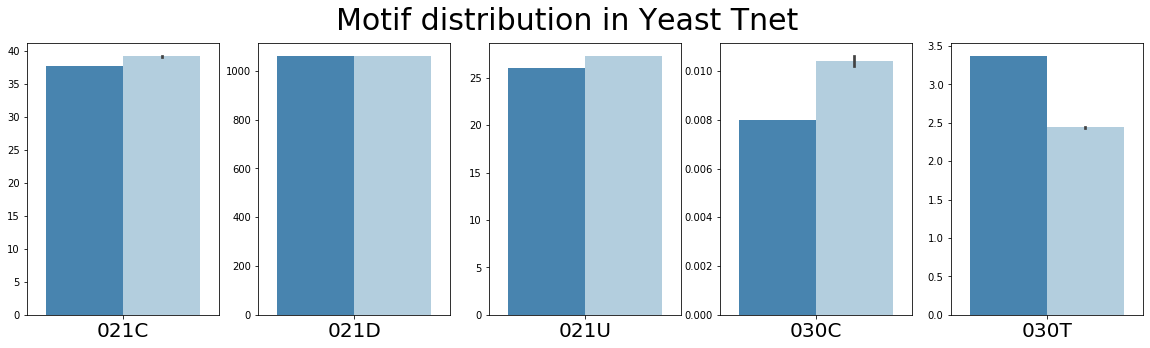

In [7]:
f.plot_distr(counters, counter_orig, label="Motif distribution in Yeast Tnet", highlight=False);

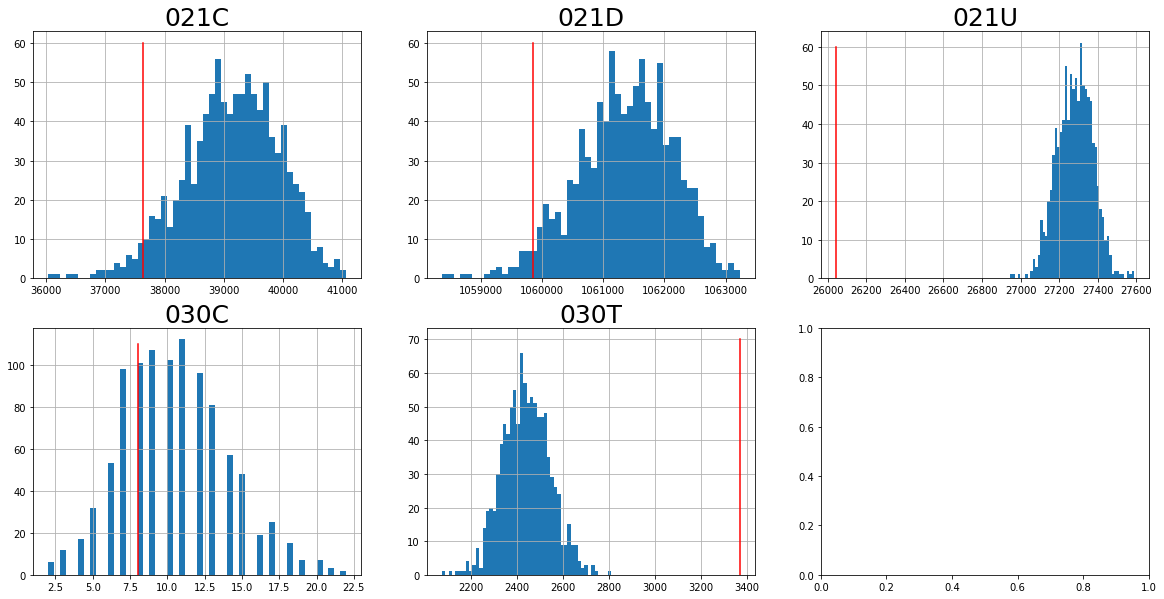

In [8]:
f.plot_distr_2(counters, counter_orig, ticks = [60, 60, 60, 110, 70])

In [9]:
f.build_zscores_report(counters, counter_orig)

,N_real,mean(N_rand),sd(N_rand),Z-score,P-value,Result
021C,37631,39133.2,798.108,-1.88218,0.036,non-significant
021D,1059856,1.06136e+06,775.767,-1.94061,0.032,non-significant
021U,26042,27282.5,91.95,-13.4915,0,< 0.01
030C,8,10.405,3.54753,-0.677936,0.319,non-significant
030T,3370,2439.5,102.095,9.11403,0,< 0.01


# Ecoli Tnet

In [10]:
cfg = f.update_cfg("./config.json", "NETWORK_TO_SEARCH_IN", "ecoli")

RANDOM_SEED: 19
TEST_NETWORK_SIZE: 500
TEST_NETWORK_LINK_PROB: 0.1
N_CORES_TO_USE: -1
NETWORK_TO_SEARCH_IN: ecoli


In [11]:
interaction_matrix = f.get_interaction_matrix(cfg)

In [12]:
%%time
motifs_orig, counter_orig = f.motif_search(cfg, interaction_matrix, batch_size=10000)
counter_orig

CPU times: user 817 ms, sys: 99.9 ms, total: 917 ms
Wall time: 3.23 s


{'021C': 3938, '021D': 329287, '021U': 4365, '030C': 0, '030T': 1392}

#### Random networks motif counting

In [6]:
N_SIMS = 1000
N_STEPS = 10
N_SWAPS = 70000
counters = f.generate_random_networks(cfg, interaction_matrix, N_SIMS, N_STEPS, N_SWAPS)
# joblib.dump(counters, "./networks/ecoli/shuffled_counters.gz");

#### Z-score and P-value estimation

In [13]:
counters = joblib.load("./networks/ecoli/shuffled_counters.gz");

100%|██████████| 1000/1000 [00:03<00:00, 256.02it/s]


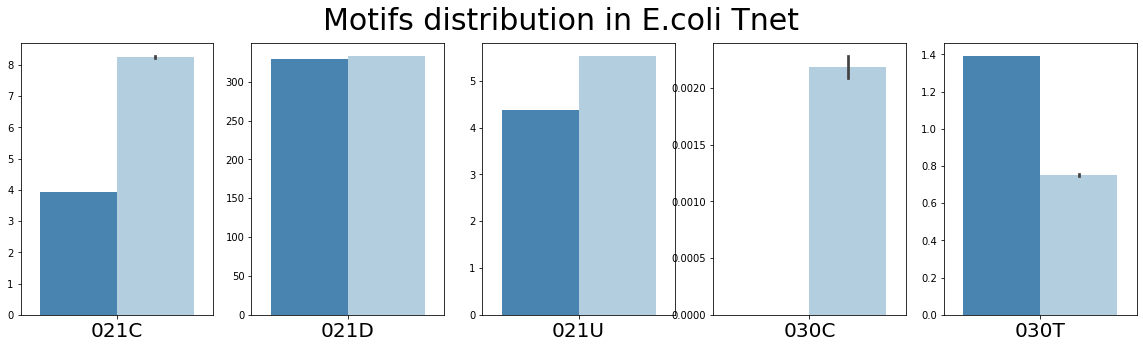

In [14]:
df, fig = f.plot_distr(counters, counter_orig, label="Motifs distribution in E.coli Tnet", highlight=False);

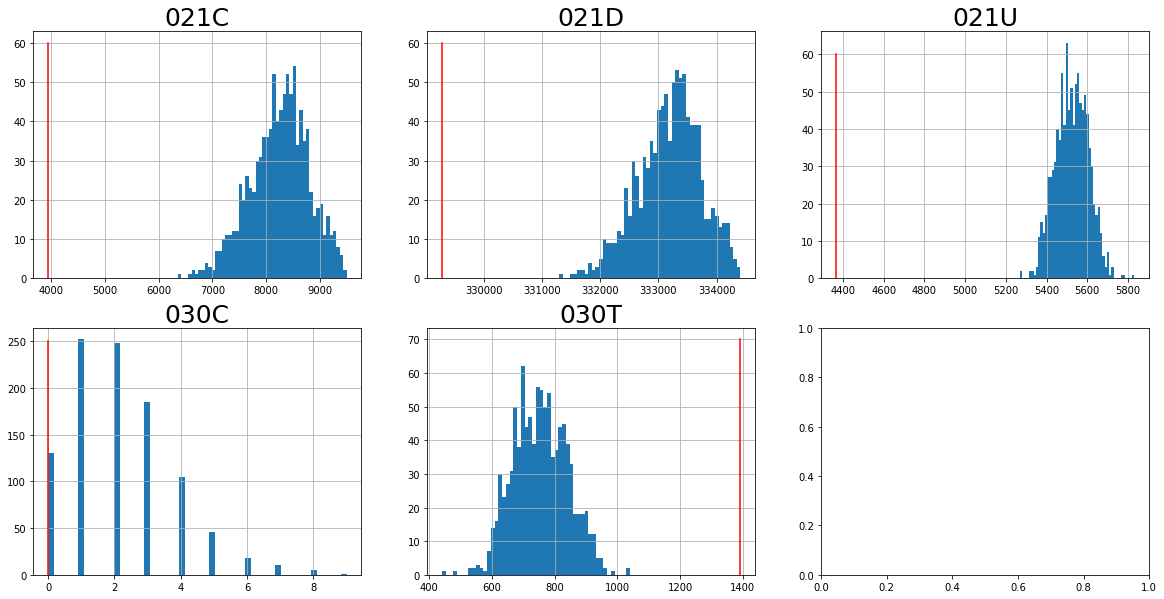

In [16]:
f.plot_distr_2(counters, counter_orig, ticks = [60, 60, 60, 250, 70])

In [17]:
f.build_zscores_report(counters, counter_orig)

,N_real,mean(N_rand),sd(N_rand),Z-score,P-value,Result
021C,3938,8250.95,544.278,-7.92417,0,< 0.01
021D,329287,333191,537.226,-7.26617,0,< 0.01
021U,4365,5524.94,79.8659,-14.5235,0,< 0.01
030C,0,2.18,1.58921,-1.37175,0.13,non-significant
030T,1392,754.326,86.0515,7.41038,0,< 0.01


# GS 0.1 net

In [18]:
cfg = f.update_cfg("./config.json", "NETWORK_TO_SEARCH_IN", "gs0.1")

RANDOM_SEED: 19
TEST_NETWORK_SIZE: 500
TEST_NETWORK_LINK_PROB: 0.1
N_CORES_TO_USE: -1
NETWORK_TO_SEARCH_IN: gs0.1


In [19]:
interaction_matrix = f.get_interaction_matrix(cfg)

In [20]:
%%time
motifs_orig, counter_orig = f.motif_search(cfg, interaction_matrix, batch_size=10000)
counter_orig

CPU times: user 46.4 ms, sys: 49.8 ms, total: 96.1 ms
Wall time: 2.22 s


{'021C': 9459, '021D': 5261, '021U': 4079, '030C': 17, '030T': 73}

#### Random networks motif counting

In [6]:
N_SIMS = 1000
N_STEPS = 10
N_SWAPS = 40000
counters = f.generate_random_networks(cfg, interaction_matrix, N_SIMS, N_STEPS, N_SWAPS)
# joblib.dump(counters, "./networks/gs0.1/shuffled_counters.gz");

#### Z-score and P-value estimation

In [21]:
counters = joblib.load("./networks/gs0.1/shuffled_counters.gz");

100%|██████████| 1000/1000 [00:04<00:00, 245.88it/s]


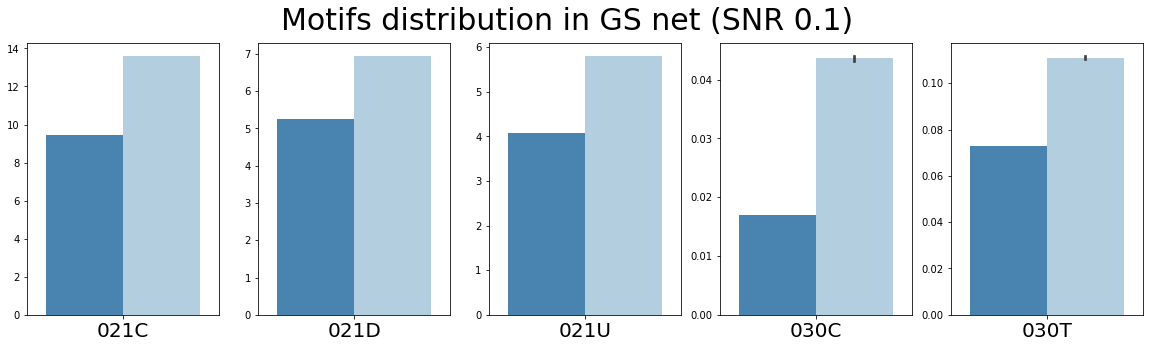

In [22]:
f.plot_distr(counters, counter_orig, label="Motifs distribution in GS net (SNR 0.1)", highlight=False);

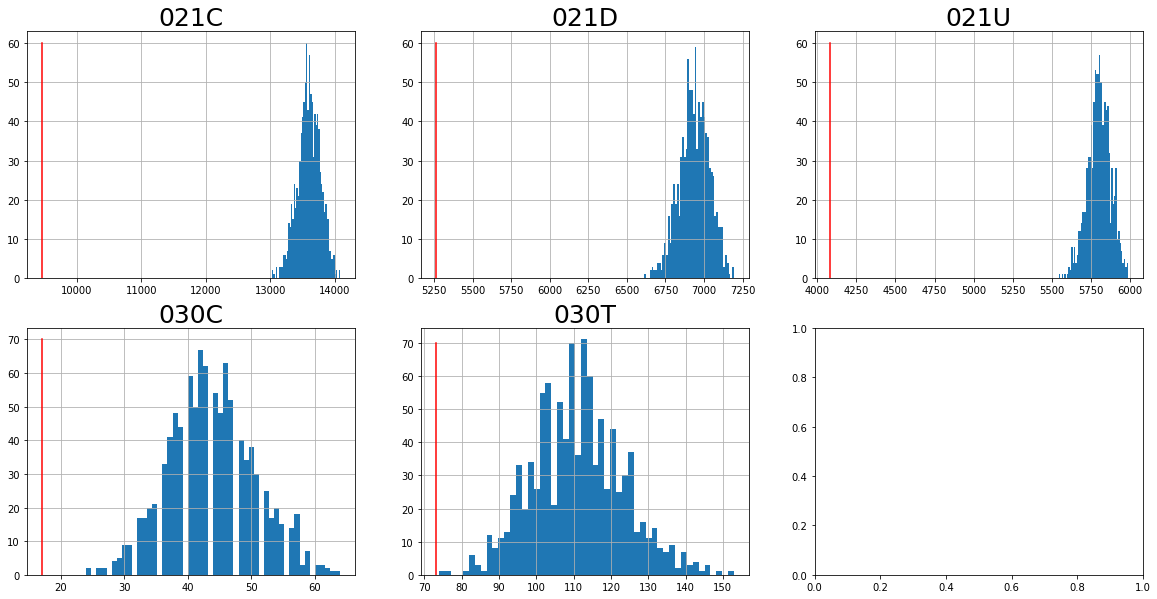

In [26]:
f.plot_distr_2(counters, counter_orig, ticks = [60, 60, 60, 70, 70])

In [27]:
f.build_zscores_report(counters, counter_orig)

,N_real,mean(N_rand),sd(N_rand),Z-score,P-value,Result
021C,9459,13594.9,175.585,-23.5552,0,< 0.01
021D,5261,6937.75,97.3987,-17.2153,0,< 0.01
021U,4079,5801.72,73.102,-23.566,0,< 0.01
030C,17,43.626,6.80824,-3.91085,0,< 0.01
030T,73,111.069,12.1616,-3.13027,0,< 0.01


# Human

In [1]:
# %load_ext autoreload
# %autoreload 2
import os
import sys
sys.path.insert(0, "./scripts")
import numpy as np
import pandas as pd
from itertools import combinations, product
import joblib
import functions as f

In [2]:
cfg = f.get_actual_parametrization("config.json")

RANDOM_SEED: 19
TEST_NETWORK_SIZE: 500
TEST_NETWORK_LINK_PROB: 0.1
N_CORES_TO_USE: -1
NETWORK_TO_SEARCH_IN: yeast


In [4]:
HUMAN_NETWORK_PATH = "./networks/human"

In [5]:
edges = pd.read_csv("./networks/human/trrust_rawdata.human.tsv", sep="\t", header=None)[[0, 1]]
edges.columns = ["Tf", "Tg"]
nodes = sorted(np.unique(np.concatenate((edges.Tf.unique(), edges.Tg.unique()))))
nodes = pd.DataFrame(data=range(len(nodes)), index=nodes, columns=["idx"])
print(f"Total genes number:\t{len(nodes)}")
print(f"Interactions number:\t{len(edges)}")
edges.head()

Total genes number:	2862
Interactions number:	9396


,Tf,Tg
0,AATF,BAX
1,AATF,CDKN1A
2,AATF,KLK3
3,AATF,MYC
4,AATF,TP53


In [7]:
edges_ = edges.join(nodes, on="Tf").join(nodes, on="Tg", lsuffix="_tf", rsuffix="_tg")
tf_nodes = edges_["idx_tf"].unique()
print(f"Total TF:\t{len(tf_nodes)}")
tg_nodes = edges_["idx_tg"].unique()
print(f"Total TG:\t{len(tg_nodes)}")
tf_x_tg_nodes = np.array(sorted(set(tf_nodes) & set(tg_nodes)))
print(f"TF and TG:\t{len(tf_x_tg_nodes)}")
tg_only_nodes = np.array(sorted(set(tg_nodes) - set(tf_nodes)))
print(f"TG only:\t{len(tg_only_nodes)}")
tf_only_nodes = np.array(sorted(set(tf_nodes) - set(tg_nodes)))
print(f"TF only:\t{len(tf_only_nodes)}")

meta = tf_nodes, tf_only_nodes, tg_nodes, tg_only_nodes, tf_x_tg_nodes
joblib.dump(meta, os.path.join(HUMAN_NETWORK_PATH, "meta.pkl"));

Total TF:	795
Total TG:	2492
TF and TG:	425
TG only:	2067
TF only:	370


In [8]:
def build_Tnet(edges, n):
    Tnet = np.zeros((n, n))
    Tnet[edges[:, 0], edges[:, 1]] = 1
    return Tnet

np_edges = edges_[["idx_tg", "idx_tf"]].values
interaction_matrix = build_Tnet(np_edges, len(nodes))

if not os.path.exists(HUMAN_NETWORK_PATH):
    os.mkdir(HUMAN_NETWORK_PATH)

joblib.dump(interaction_matrix, os.path.join(HUMAN_NETWORK_PATH, "interaction_matrix.gz"));

In [9]:
interaction_matrix.shape, interaction_matrix.sum()

((2862, 2862), 8427.0)

In [11]:
%%time
motifs, counter = f.motif_search(cfg, interaction_matrix, batch_size=10000)
motifs_orig = motifs["030T"]
counter

CPU times: user 1.16 s, sys: 152 ms, total: 1.31 s
Wall time: 6.62 s


{'021C': 64810, '021D': 328320, '021U': 38680, '030C': 85, '030T': 4152}

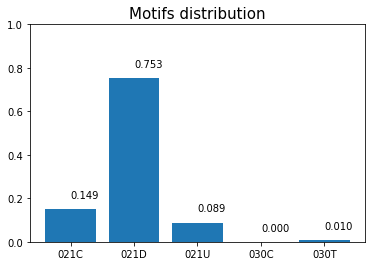

In [12]:
f.plot_motif_distr(counter)

Motif enrichment

In [13]:
from tqdm import tqdm
from matplotlib import pyplot as plt

In [14]:
noise_list = np.linspace(0, 80000, 11).astype(int)
score_list = []
for noise in tqdm(noise_list):
    shuffled_matrix = f.get_shuffled_matrix(interaction_matrix, noise)
    score_list.append(1-f.corruption_score(interaction_matrix, shuffled_matrix))

100%|██████████| 11/11 [02:08<00:00, 11.67s/it]


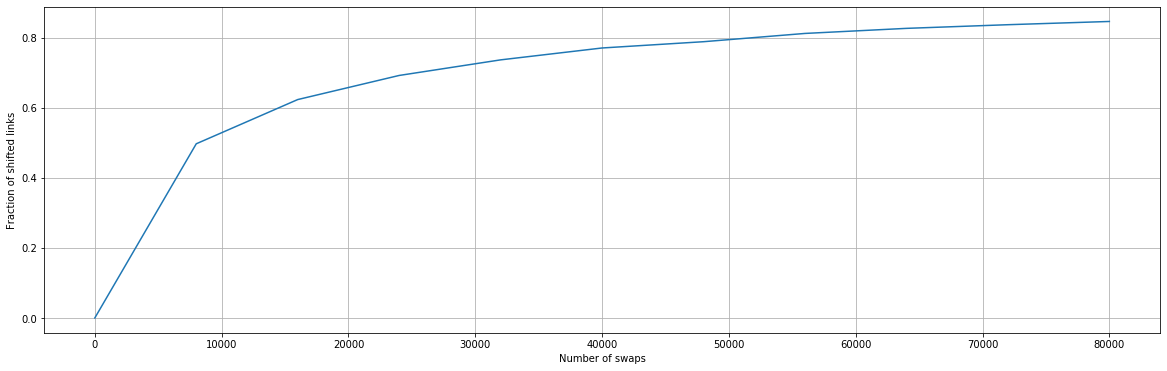

In [15]:
plt.figure(figsize=(20, 6))
plt.grid()
plt.ylabel("Fraction of shifted links")
plt.xlabel("Number of swaps")
plt.plot(noise_list, score_list);

In [18]:
import networkx as nx

In [16]:
ffl_nodes = list(set(sum([list(map(int, x.split("_"))) for x in motifs_orig], [])))
interaction_matrix_ffl = np.zeros((len(ffl_nodes), len(ffl_nodes)))
for motif in motifs_orig:
    motif = f.split_motif(motif)
    motif_new = list(ffl_nodes.index(x) for x in motif)
    interaction_matrix_ffl[np.ix_(motif_new, motif_new)] = \
    interaction_matrix[np.ix_(motif, motif)]
interaction_matrix_ffl.shape, interaction_matrix_ffl.sum()

((993, 993), 4023.0)

In [17]:
motifs_network = f.build_vmn(motifs_orig, verbose=True)

100%|██████████| 8617476/8617476 [00:39<00:00, 220275.38it/s]


In [19]:
V = nx.Graph(motifs_network)
nx.is_connected(V)

False

In [26]:
# components = list(nx.algorithms.components.connected_components(V))
main_ffl_motifs = [motifs_orig[i] for i in components[0]]

In [28]:
len(main_ffl_motifs), len(main_ffl_motifs)/len(motifs_orig)

(4150, 0.9995183044315993)

In [3]:
interaction_matrix = joblib.load("./networks/human/interaction_matrix.gz")

In [4]:
interaction_matrix.shape, interaction_matrix.sum()

((2862, 2862), 8427.0)

In [9]:
%%time
motifs, counter = f.motif_search(cfg, interaction_matrix, batch_size=10000)
motifs_orig = motifs["030T"]
counter

CPU times: user 907 ms, sys: 102 ms, total: 1.01 s
Wall time: 4.1 s


{'021C': 64810, '021D': 328320, '021U': 38680, '030C': 85, '030T': 4152}

In [5]:
N_SIMS = 1000
N_STEPS = 10
N_SWAPS = 60000
counters = f.generate_random_networks(cfg, interaction_matrix, N_SIMS, N_STEPS, N_SWAPS)

100%|██████████| 100/100 [07:02<00:00,  4.22s/it]


In [6]:
joblib.dump(counters, "./networks/human/shuffled_counters.gz");

In [7]:
counters = joblib.load("./networks/human/shuffled_counters.gz");

100%|██████████| 1000/1000 [00:04<00:00, 237.47it/s]


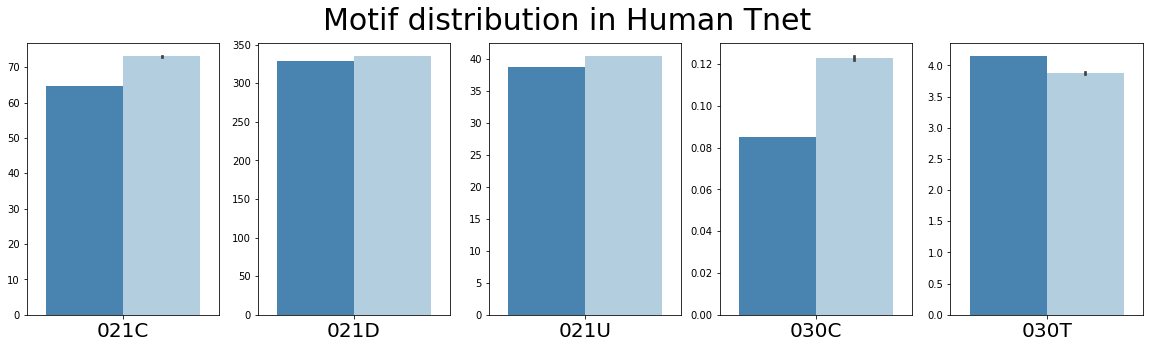

In [10]:
f.plot_distr(counters, counter, label="Motif distribution in Human Tnet", highlight=False);

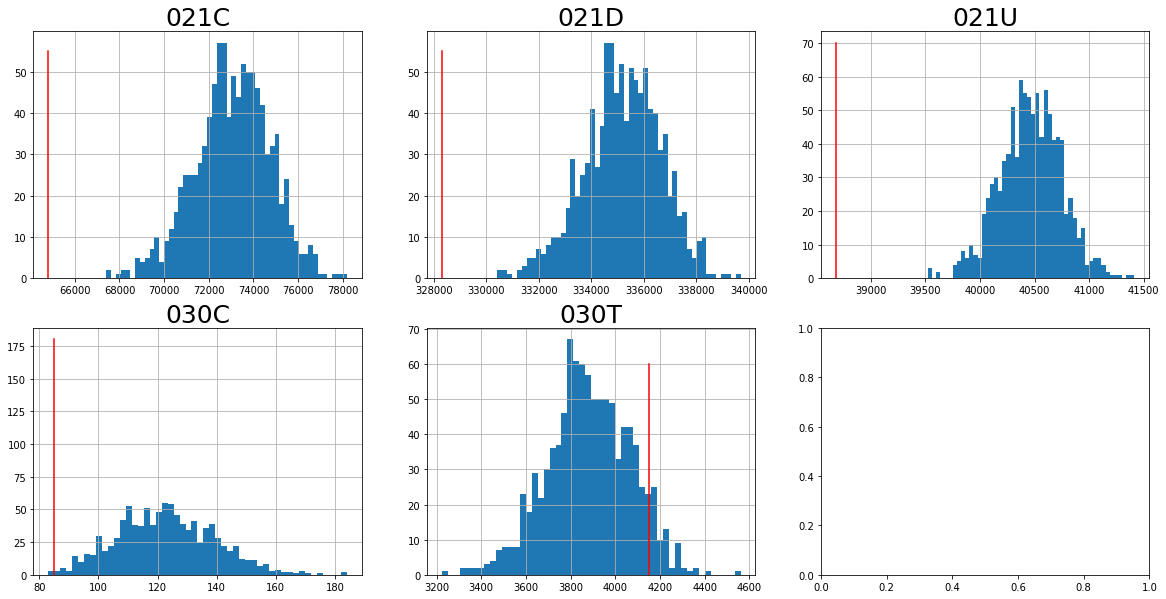

In [11]:
f.plot_distr_2(counters, counter, ticks = [55, 55, 70, 180, 60])

In [12]:
f.build_zscores_report(counters, counter)

,N_real,mean(N_rand),sd(N_rand),Z-score,P-value,Result
021C,64810,73060.5,1684.39,-4.89824,0,< 0.01
021D,328320,335191,1468.23,-4.67994,0,< 0.01
021U,38680,40463.2,281.554,-6.33358,0,< 0.01
030C,85,122.97,16.2777,-2.33263,0.003,< 0.05
030T,4152,3880.66,186.654,1.45373,0.072,non-significant


# Mouse

In [34]:
interaction_matrix = joblib.load("./networks/mouse/interaction_matrix.gz")
interaction_matrix.shape, interaction_matrix.sum()

((2456, 2456), 6490.0)

In [32]:
%%time
motifs, counter = f.motif_search(cfg, interaction_matrix, batch_size=10000)
motifs_orig = motifs["030T"]
counter

CPU times: user 461 ms, sys: 115 ms, total: 575 ms
Wall time: 3.72 s


{'021C': 40969, '021D': 135077, '021U': 20789, '030C': 60, '030T': 1956}

In [33]:
ffl_nodes = list(set(sum([list(map(int, x.split("_"))) for x in motifs_orig], [])))
interaction_matrix_ffl = np.zeros((len(ffl_nodes), len(ffl_nodes)))
for motif in motifs_orig:
    motif = f.split_motif(motif)
    motif_new = list(ffl_nodes.index(x) for x in motif)
    interaction_matrix_ffl[np.ix_(motif_new, motif_new)] = \
    interaction_matrix[np.ix_(motif, motif)]
interaction_matrix_ffl.shape, interaction_matrix_ffl.sum()

((773, 773), 2697.0)

In [35]:
motifs_network = f.build_vmn(motifs_orig, verbose=True)

100%|██████████| 1911990/1911990 [00:09<00:00, 207426.81it/s]


In [36]:
V = nx.Graph(motifs_network)
nx.is_connected(V)

False

In [38]:
components = list(nx.algorithms.components.connected_components(V))
main_ffl_motifs = [motifs_orig[i] for i in components[0]]

In [39]:
len(main_ffl_motifs), len(main_ffl_motifs)/len(motifs_orig)

(1950, 0.9969325153374233)